Davies-Bouldin Index: 0.8491558302577694


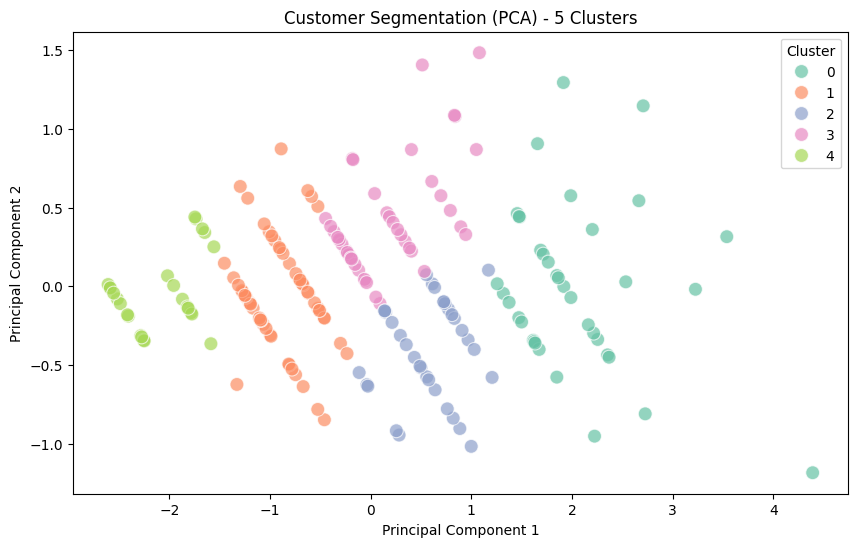

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


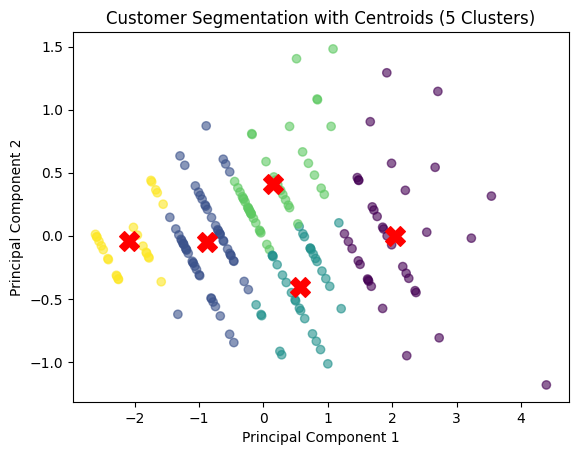

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

# Load the datasets
customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Merge transaction data with customer data
transaction_summary = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',   # Total spending
    'TransactionID': 'count'  # Number of transactions
}).reset_index()

# Merge with customer profile data (e.g., region)
customer_profile = customers[['CustomerID', 'Region']]
customer_data = pd.merge(transaction_summary, customer_profile, on='CustomerID')

# Feature Engineering:
# Convert categorical 'Region' into dummy variables
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

# Standardize the features (normalize them)
scaler = StandardScaler()
customer_data[['TotalValue', 'TransactionID']] = scaler.fit_transform(customer_data[['TotalValue', 'TransactionID']])

# Perform K-Means clustering (choose k between 2 and 10)
k = 5  # You can experiment with different values for k (between 2 and 10)
kmeans = KMeans(n_clusters=k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['TotalValue', 'TransactionID']])

# Clustering Evaluation:
# Davies-Bouldin Index (lower value is better)
db_index = davies_bouldin_score(customer_data[['TotalValue', 'TransactionID']], customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters using PCA (2D projection of the data)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_data[['TotalValue', 'TransactionID']])

# Create a DataFrame for plotting
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = customer_data['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=pca_df, s=100, alpha=0.7)
plt.title(f"Customer Segmentation (PCA) - {k} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Optionally, if you want to show more cluster details (centroids, etc.)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_data['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')  # Mark centroids
plt.title(f"Customer Segmentation with Centroids ({k} Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

